# Getting Started

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow import keras

In [166]:
data = pd.read_csv("Data_with_Headers.csv")

In [167]:
data.drop('Date', axis = 1, inplace = True)
data.drop('Stations', axis = 1, inplace = True)
data.drop('townName', axis = 1, inplace = True)

In [168]:
data

,Latitude,Longitude,Elevation,awnd,Precipitation,Snow,snwd,TempAvg,TempMax,TempMin,TempOBS,Wesf,wt01,wt02,wt03,wt04,wt05,wt06,wt08,wt09,wt11
0,42.426850,-73.289070,363.9,9.40,0,0.0,0.0,21.5,29,14,0,0.0,0,0,0,0,0,0,0,0,0
1,42.697280,-73.169670,195.1,6.49,0,0.0,0.0,21.5,32,11,0,0.0,0,0,0,0,0,0,0,0,0
2,42.386100,-72.537400,44.2,0.00,0,0.0,0.0,20.5,30,11,19,0.0,0,0,0,0,0,0,0,0,0
3,42.270600,-71.873100,304.8,14.99,0,0.0,0.0,20.0,30,13,0,0.0,0,0,0,0,0,0,0,0,0
4,42.426850,-73.289070,363.9,12.30,0,0.0,0.0,27.0,33,21,0,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10841,42.426850,-73.289070,363.9,10.29,1,0.0,0.0,32.0,37,27,0,0.0,1,0,0,0,0,1,0,0,0
10842,42.697280,-73.169670,195.1,11.18,1,0.0,0.0,35.0,40,30,0,0.0,1,0,0,0,0,0,0,0,0
10843,42.386100,-72.537400,44.2,0.00,1,0.0,0.0,28.5,38,19,38,0.0,0,0,0,0,0,0,0,0,0
10844,42.117921,-72.618386,17.4,0.00,1,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0


In [169]:
pd.set_option('display.max_columns', None)

In [170]:
data.isnull()

,Latitude,Longitude,Elevation,awnd,Precipitation,Snow,snwd,TempAvg,TempMax,TempMin,TempOBS,Wesf,wt01,wt02,wt03,wt04,wt05,wt06,wt08,wt09,wt11
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10841,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10842,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10843,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [171]:
data.isnull().sum()

Latitude         0
Longitude        0
Elevation        0
awnd             0
Precipitation    0
Snow             0
snwd             0
TempAvg          0
TempMax          0
TempMin          0
TempOBS          0
Wesf             0
wt01             0
wt02             0
wt03             0
wt04             0
wt05             0
wt06             0
wt08             0
wt09             0
wt11             0
dtype: int64

In [172]:
data.dtypes

Latitude         float64
Longitude        float64
Elevation        float64
awnd             float64
Precipitation      int64
Snow             float64
snwd             float64
TempAvg          float64
TempMax            int64
TempMin            int64
TempOBS            int64
Wesf             float64
wt01               int64
wt02               int64
wt03               int64
wt04               int64
wt05               int64
wt06               int64
wt08               int64
wt09               int64
wt11               int64
dtype: object

In [173]:
data['Precipitation'].unique()

array([0, 1])

In [174]:
y = data['Precipitation']
X = data.drop('Precipitation', axis = 1)

In [175]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10841    1
10842    1
10843    1
10844    1
10845    1
Name: Precipitation, Length: 10846, dtype: int64

In [176]:
X

,Latitude,Longitude,Elevation,awnd,Snow,snwd,TempAvg,TempMax,TempMin,TempOBS,Wesf,wt01,wt02,wt03,wt04,wt05,wt06,wt08,wt09,wt11
0,42.426850,-73.289070,363.9,9.40,0.0,0.0,21.5,29,14,0,0.0,0,0,0,0,0,0,0,0,0
1,42.697280,-73.169670,195.1,6.49,0.0,0.0,21.5,32,11,0,0.0,0,0,0,0,0,0,0,0,0
2,42.386100,-72.537400,44.2,0.00,0.0,0.0,20.5,30,11,19,0.0,0,0,0,0,0,0,0,0,0
3,42.270600,-71.873100,304.8,14.99,0.0,0.0,20.0,30,13,0,0.0,0,0,0,0,0,0,0,0,0
4,42.426850,-73.289070,363.9,12.30,0.0,0.0,27.0,33,21,0,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10841,42.426850,-73.289070,363.9,10.29,0.0,0.0,32.0,37,27,0,0.0,1,0,0,0,0,1,0,0,0
10842,42.697280,-73.169670,195.1,11.18,0.0,0.0,35.0,40,30,0,0.0,1,0,0,0,0,0,0,0,0
10843,42.386100,-72.537400,44.2,0.00,0.0,0.0,28.5,38,19,38,0.0,0,0,0,0,0,0,0,0,0
10844,42.117921,-72.618386,17.4,0.00,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0


In [177]:
scaler = RobustScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [178]:
X

,Latitude,Longitude,Elevation,awnd,Snow,snwd,TempAvg,TempMax,TempMin,TempOBS,Wesf,wt01,wt02,wt03,wt04,wt05,wt06,wt08,wt09,wt11
0,0.260800,-1.060756,0.647736,0.722981,0.0,0.0,-0.475610,-0.477273,-0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.991552,-0.871912,0.000000,0.361491,0.0,0.0,-0.475610,-0.409091,-0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.128088,-0.579048,-0.444720,0.0,0.0,-0.500000,-0.454545,-0.538462,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.739200,1.178746,0.420952,1.417391,0.0,0.0,-0.512195,-0.454545,-0.487179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260800,-1.060756,0.647736,1.083230,0.0,0.0,-0.341463,-0.386364,-0.282051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10841,0.260800,-1.060756,0.647736,0.833540,0.0,0.0,-0.219512,-0.295455,-0.128205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10842,1.991552,-0.871912,0.000000,0.944099,0.0,0.0,-0.146341,-0.227273,-0.051282,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10843,0.000000,0.128088,-0.579048,-0.444720,0.0,0.0,-0.304878,-0.272727,-0.333333,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10844,-1.716346,0.000000,-0.681888,-0.444720,0.0,0.0,-1.000000,-1.136364,-0.820513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [180]:
inputs = tf.keras.Input(shape = (20,))
x = tf.keras.layers.Dense(16, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(16, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(2, activation = 'softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [181]:
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 20)]              0         
_________________________________________________________________
dense_36 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_37 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 34        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [182]:
model.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [183]:
EPOCHS = 24
BATCH_SIZE = 32

In [184]:
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1
)

Train on 6940 samples, validate on 1736 samples
Epoch 1/24
6940/6940 [==============================] - 1s 151us/sample - loss: 0.6835 - accuracy: 0.6393 - val_loss: 0.5912 - val_accuracy: 0.7529
Epoch 2/24
6940/6940 [==============================] - 0s 70us/sample - loss: 0.5674 - accuracy: 0.7439 - val_loss: 0.5421 - val_accuracy: 0.7621
Epoch 3/24
6940/6940 [==============================] - 0s 72us/sample - loss: 0.5294 - accuracy: 0.7533 - val_loss: 0.5374 - val_accuracy: 0.7362
Epoch 4/24
6940/6940 [==============================] - 1s 73us/sample - loss: 0.5148 - accuracy: 0.7579 - val_loss: 0.5086 - val_accuracy: 0.7644
Epoch 5/24
6940/6940 [==============================] - 0s 71us/sample - loss: 0.5032 - accuracy: 0.7638 - val_loss: 0.5029 - val_accuracy: 0.7702
Epoch 6/24
6940/6940 [==============================] - 1s 72us/sample - loss: 0.4947 - accuracy: 0.7725 - val_loss: 0.4943 - val_accuracy: 0.7759
Epoch 7/24
6940/6940 [==============================] - 1s 74us/sampl

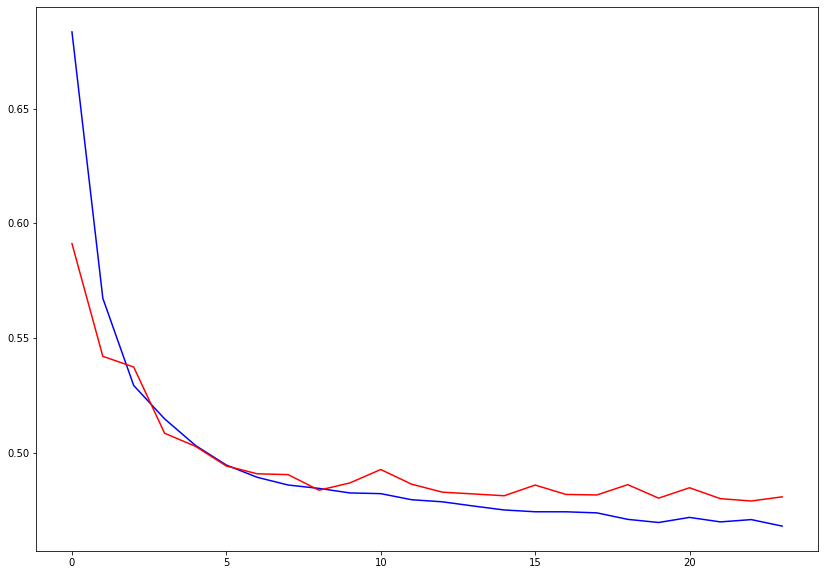

In [185]:
plt.figure(figsize=(14,10))

plt.plot(range(EPOCHS), history.history['loss'], color = 'b')
plt.plot(range(EPOCHS), history.history['val_loss'], color = 'r')

In [186]:
np.argmin(history.history['val_loss'])

22

In [187]:
print(f"Model Accuracy: {model.evaluate(X_test, y_test, verbose=0)[1]}")

Model Accuracy: 0.7760368585586548


In [188]:
y_pred = model.predict(X_test)
y_pred

array([[0.64632916, 0.3536708 ],
       [0.9402806 , 0.05971941],
       [0.6886906 , 0.3113094 ],
       ...,
       [0.44151422, 0.5584858 ],
       [0.64632916, 0.3536708 ],
       [0.9452598 , 0.05474016]], dtype=float32)

In [189]:
y_pred = list(map(lambda x: np.argmax(x), y_pred))

In [190]:
y_pred

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
